Correlation between repetitiveness of ad and sales amount

Sales performance: post-click-conv / impressions, post-view-conv / impressions,

conversions per EUR (buyer bid) → 1000*(post-click-conv + post-view-conv) / buyer bid

NB: buyer bid is per 1000 impressions

In [1]:
import pandas as pd
import sqlite3
import numpy as np

path = "../Data/"
data = pd.read_csv(path + "DataChallenge2019_GreenhouseGroup_Bidding_Algorithms_Tests.csv",sep=";") # reading original data

def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

to compute the sales: 

1000*(data_subset["post_click_conv"]+data_subset["post_view_conv"])/data_subset["media_cost"]

In [4]:
data_subset = data[["impressions_inview","post_click_conv","unique_user_inview","post_view_conv","media_cost"]]

data_subset["view_frequency"]= data_subset["impressions_inview"]/data_subset["unique_user_inview"]
data_subset["conversion_per_eur"]= 1000*(data_subset["post_click_conv"]+data_subset["post_view_conv"])/data_subset["media_cost"]
data_subset["buying_per_impression"]= (data_subset["post_click_conv"]+data_subset["post_view_conv"])/data["impressions_inview"]
data_subset.dropna(inplace=True)

# replace NA as mean
# data_subset['conversion_per_eur'].replace(to_replace=np.nan,value = data_subset['conversion_per_eur'].mean(skipna=True),inplace=True)
# data_subset['poc_per_view'].replace(to_replace=np.nan,value = data_subset['poc_per_view'].mean(skipna=True),inplace=True)
# data_subset['pov_per_view'].replace(to_replace=np.nan,value = data_subset['pov_per_view'].mean(skipna=True),inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

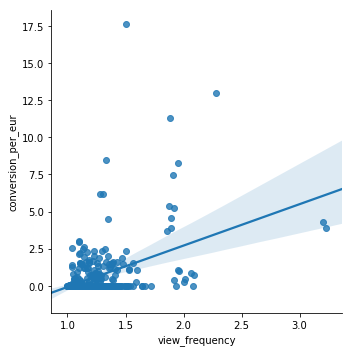

In [16]:
# correlation between view frequency and conversion per euro (with outlier)
# lmplot
import seaborn as sns
sns_fig= sns.lmplot(x="view_frequency",y="conversion_per_eur",data=data_subset,fit_reg=True)#,scatter_kws={'s':20}) 
sns_fig.savefig("Corr_AD_sales_per_eur.png")

In [13]:
# data_subset.scatter(x="poc_per_view",y="conversion_per_eur",)
# lmplot
# import seaborn as sns
# sns_fig= sns.lmplot(x="view_frequency",y="buying_per_impression",data=data_subset,fit_reg=True)#,scatter_kws={'s':20}) 
# sns_fig.savefig("Corr_AD_sales_per_impression.png")

In [7]:
# correlation between view frequency and conversion per euro
from scipy import stats
gradient, intercept, r_value, p_value, std_err = stats.linregress(data_subset["view_frequency"],data_subset["conversion_per_eur"])
print("R-squared", r_value**2)
print("p value",p_value)
print("stand error",std_err)
print("intercept",intercept)

R-squared 0.1934212698315276
p value 3.8339755431963615e-22
stand error 0.27277110307777347
intercept -2.8726158341890375


In [8]:
from scipy import stats
gradient, intercept, r_value, p_value, std_err = stats.linregress(data_subset["view_frequency"],data_subset["buying_per_impression"])
print("R-squared", r_value**2)
print("p value",p_value)
print("stand error",std_err)
print("intercept",intercept)

R-squared 0.11821732890984366
p value 1.3406678304828403e-13
stand error 0.0014785056872431437
intercept -0.011087929225729373


R-squared 0.04183672834994215
p value 7.918053609007912e-05
stand error 0.05770821836330976
intercept -0.18535492056207514


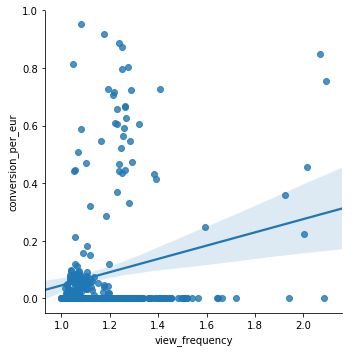

In [17]:
# no outlier, correlation between view frequency and conversion per euro

from scipy import stats

no_outlier_dataset = remove_outlier(data_subset,"conversion_per_eur")

gradient, intercept, r_value, p_value, std_err = stats.linregress(no_outlier_dataset["view_frequency"],no_outlier_dataset["conversion_per_eur"])
print("R-squared", r_value**2)
print("p value",p_value)
print("stand error",std_err)
print("intercept",intercept)

#without outlier plot
sns_fig= sns.lmplot(x="view_frequency",y="conversion_per_eur",data=no_outlier_dataset,fit_reg=True)#,scatter_kws={'s':20}) 
sns_fig.savefig("Corr_AD_sales_per_eur.png")